# 1

Download the minnesota graph (attached) and plot it

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

The edege file has tuples of form (nodeI, nodeJ). Node I and J are identifiers that are given to the nodes when read from the verts file line by line. In the first line (line 0) of the verts file, there are the coordinates of the first node, in the second line (line 1) there are the coordinates of the second node, and so on. The node identifiers are the line numbers of the verts file, starting from 0. 

Read and create vertices


In [26]:
#read ./minnesota/verts.txt and ./minnesota/edges.txt
#output ./minnesota/verts.txt and ./minnesota/edges.txt

with open('minnesota/verts.txt', 'r') as vertsFile:
    position = vertsFile.readlines()
    position = [x.strip() for x in position]
    position = [x.split() for x in position]
    position = [[np.float64(x[0]), np.float64(x[1])] for x in position]

verts = [x for x in range(len(position))]
print(f"Len verts: {len(verts)}")
print(f"Len position: {len(position)}")

Len verts: 2635
Len position: 2635


Len edges: 3298
Edges: [[0.0, 6.0], [1.0, 16.0], [2.0, 3.0], [2.0, 11.0], [4.0, 9.0], [5.0, 8.0], [6.0, 7.0], [6.0, 14.0], [8.0, 9.0], [8.0, 12.0], [9.0, 10.0], [10.0, 11.0], [10.0, 43.0], [11.0, 20.0], [12.0, 18.0], [13.0, 14.0], [14.0, 15.0], [15.0, 16.0], [15.0, 34.0], [16.0, 31.0], [17.0, 18.0], [18.0, 19.0], [19.0, 22.0], [19.0, 51.0], [20.0, 21.0], [20.0, 23.0], [21.0, 39.0], [22.0, 44.0], [23.0, 31.0], [24.0, 25.0], [25.0, 26.0], [25.0, 28.0], [26.0, 29.0], [26.0, 30.0], [27.0, 28.0], [27.0, 35.0], [28.0, 29.0], [29.0, 36.0], [30.0, 37.0], [31.0, 34.0], [31.0, 41.0], [32.0, 33.0], [32.0, 34.0], [32.0, 40.0], [34.0, 42.0], [35.0, 38.0], [36.0, 38.0], [37.0, 38.0], [37.0, 44.0], [38.0, 47.0], [39.0, 71.0], [40.0, 46.0], [41.0, 52.0], [42.0, 54.0], [43.0, 56.0], [44.0, 49.0], [45.0, 46.0], [46.0, 60.0], [47.0, 48.0], [47.0, 50.0], [48.0, 85.0], [49.0, 50.0], [49.0, 64.0], [50.0, 120.0], [51.0, 128.0], [52.0, 53.0], [52.0, 70.0], [53.0, 54.0], [54.0, 55.0], [54.0, 59.0], [55.0, 62.0

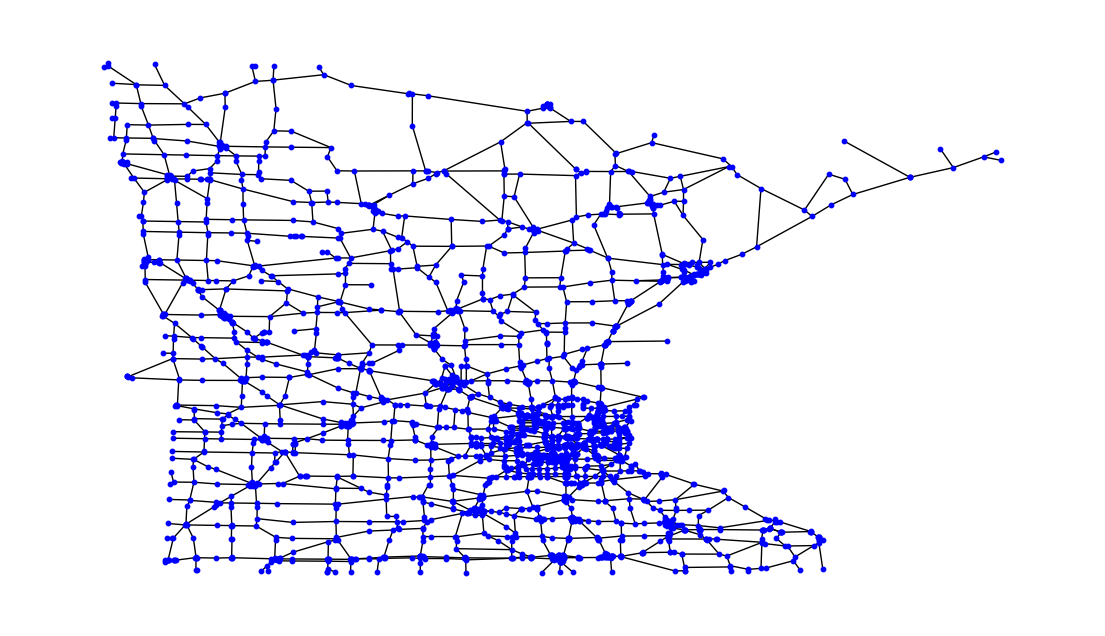

In [53]:
fig, ax = plt.subplots(1,1, figsize=(14,8), dpi=100)

G = nx.Graph()
G.add_nodes_from(verts)
for i in range(len(position)):
    G.nodes[i]['pos'] = position[i]

with open('minnesota/edges.txt', 'r') as edgesFile:
    edges = edgesFile.readlines()
    edges = [x.strip() for x in edges]
    edges = [x.split() for x in edges]
    edges = [[np.float64(x[0]), np.float64(x[1])] for x in edges]

print(f"Len edges: {len(edges)}")
print(f"Edges: {edges}")
G.add_edges_from(edges)

pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, ax=ax, node_size=10, node_color='blue', edge_color='black', with_labels=False)
plt.show()




# 2

Construct its Laplacian matrix (D-A); generate a random function x on the graph and apply the laplacian (L*x); plot x and L*x on the graph. now do the same with the function x defined by the y-coordinates of the minnesota graph nodes